In this notebook we will experiment with the AL bias mitigation technique from Richards. 
We will do this on a synthetically biased sample (sample size=700) that we obtained from the CERN dataset, with the rf classifier trained on 10 percent of the data and using a=1/28 and k=0 for the bin distribution

In [ ]:
# Some notes:
# - If you use df.loc[i], you get the instance that had index i in the original dataframe.
# - If you use df.l=iloc[i], you get the ith instance n the current dataframe.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from time import time

# Import data

In [3]:
def read_file(url):

    url = url + "?raw=true"
    df = pd.read_csv(url, encoding='cp1252', sep=',', low_memory=False)
    return df

In [4]:
url = "https://github.com/hannahgathu/Thesis-Data-Visualisations/blob/main/Prototypes/CERN_sampled_rf_0.1_dis_004_000.csv"

df= read_file(url)


In [19]:
# create sample and pool
sample_3000=df[df['in_biased_sample']==1]
pool_3000=df[df['in_biased_sample']==0]

In [5]:
df = pd.read_csv('CERN_sampled_rf_0.1_dis_004_000_700.csv')

# Visualize data

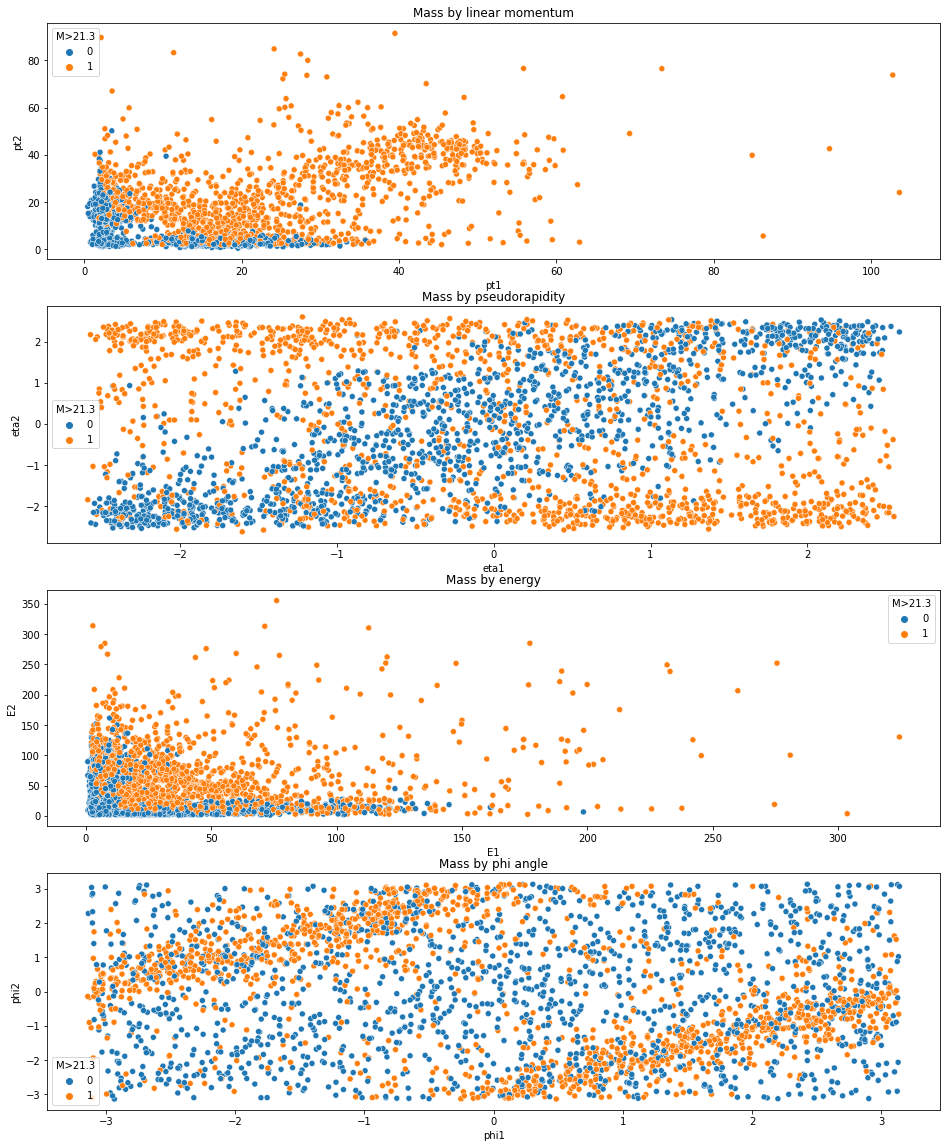

In [22]:
fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(16,20))

sns.scatterplot(ax= ax[0],data=sample_3000, x='pt1', y='pt2', hue='M>21.3')
ax[0].set_title('Mass by linear momentum')
sns.scatterplot(ax= ax[1],data=sample_3000, x='eta1', y='eta2', hue='M>21.3')
ax[1].set_title('Mass by pseudorapidity')
sns.scatterplot(ax= ax[2],data=sample_3000, x='E1', y='E2', hue='M>21.3')
ax[2].set_title('Mass by energy')
sns.scatterplot(ax= ax[3],data=sample_3000, x='phi1', y='phi2', hue='M>21.3')
ax[3].set_title('Mass by phi angle')

plt.show()

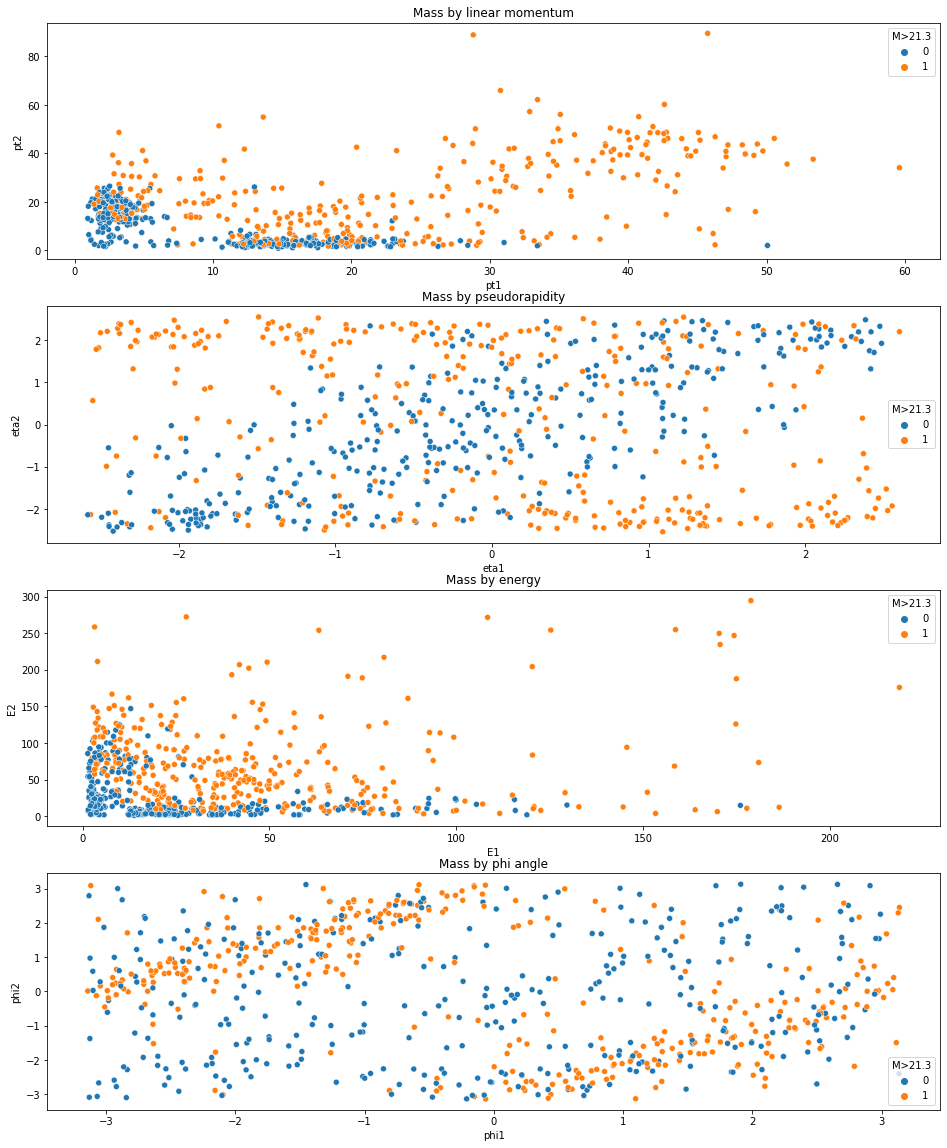

In [31]:
fig,ax = plt.subplots(nrows=4,ncols=1,figsize=(16,20))

sns.scatterplot(ax= ax[0],data=sample_700, x='pt1', y='pt2', hue='M>21.3')
ax[0].set_title('Mass by linear momentum')
sns.scatterplot(ax= ax[1],data=sample_700, x='eta1', y='eta2', hue='M>21.3')
ax[1].set_title('Mass by pseudorapidity')
sns.scatterplot(ax= ax[2],data=sample_700, x='E1', y='E2', hue='M>21.3')
ax[2].set_title('Mass by energy')
sns.scatterplot(ax= ax[3],data=sample_700, x='phi1', y='phi2', hue='M>21.3')
ax[3].set_title('Mass by phi angle')

plt.show()

# Prep data

In [6]:
# create sample and pool, the sample has size 700
sample=df[df['in_biased_sample']==1]
pool=df[df['in_biased_sample']==0]

In [25]:
X=df.drop(columns=['M>21.3','M','Run','Event','in_biased_sample'])
y=df.M>21.3
X_pool=pool.drop(columns=['M>21.3','M','Run','Event','in_biased_sample'])
X_sample = sample.drop(columns=['M>21.3','M','Run','Event','in_biased_sample'])
y_pool=pool.M>21.3
y_sample=sample.M>21.3

In [28]:
X_sample.head()

,Unnamed: 0,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
603,603,16.71910,-2.776170,-1.315440,-16.43450,3.07205,-2.378800,-2.69910,1,87.2334,18.44110,-7.32389,84.9468,19.8422,2.160730,-0.378048,1
807,807,35.45100,-14.793600,-12.356500,29.75300,19.27520,1.218700,-2.44572,1,44.5585,9.30171,5.37863,43.2436,10.7448,2.100660,0.524266,-1
1062,1062,20.07390,-0.972871,3.582960,19.72760,3.71269,2.372150,1.83593,-1,21.5028,10.23370,13.85770,-12.8688,17.2268,-0.690764,0.934707,-1
1378,1378,2.73087,-0.726482,-1.331910,-2.27065,1.51716,-1.192900,-2.07013,1,102.6150,11.85730,-12.44330,-101.1650,17.1881,-2.472820,-0.809506,1
1775,1775,2.95150,-1.787190,-0.985911,-2.13196,2.04110,-0.912505,-2.63748,1,21.5686,10.52540,-8.59622,-16.7488,13.5897,-1.036590,-0.684846,-1


In [38]:
#_sample.index
#index=pd.Index(X_sample[])
X_sample.index.get_loc(603)

0

In [41]:
int(X_sample.iloc[0].iloc[0])

603

# Train rf classifier

In [23]:
#train classifier on sample
rf = RandomForestClassifier()
t0 = time()
rf.fit(X_sample, y_sample)
print ('training time: ', round(time()-t0, 3), 's')

training time:  0.182 s


In [26]:
#accuracy on X (whole set)
t1=time()
pred_rf = rf.predict(X)
print ('predicting time: ', round(time()-t1, 3), 's')
print("Accuracy:",metrics.accuracy_score(y, pred_rf))

predicting time:  0.721 s
Accuracy: 0.82681


In [27]:
#accuracy on sample
t1=time()
pred_rf_sample = rf.predict(X_sample)
print ('predicting time: ', round(time()-t1, 3), 's')
print("Accuracy:",metrics.accuracy_score(y_sample, pred_rf_sample))


predicting time:  0.019 s
Accuracy: 1.0


## Random Forest

In [58]:
##get proximity matrix
def get_proximity_matrix(X, rf):
    
    #find proportion of indices that match between i and j
    #compute the symmetric matrix
    
    n=X.shape[0]
    tree_idxs = rf.apply(X)
    prox_mat = np.empty(shape=(n, n))
    
    for i in range(n):
        for j in range(n):
            proximity_matrix[i,j] = np.sum(np.equal(tree_idxs[i,:], tree_idxs[j,:]))
    return proximity_matrix

In [59]:
##get maximum probabilities
def get_max_class_probabilities(X,rf):
    class_probabilities= rf.predict_proba(X)
    max_class_probabilities=[0]*(len(class_probabilities))
    for i in range (len(class_probabilities)):
        max_class_probabilities[i]=max(class_probabilities[i,0],class_probabilities[i,1])
    return max_class_probabilities

In [60]:
#X=training set, pool=pool of instances to pick from
rf = RandomForestClassifier()
rf.fit(X_sample,y_sample)
#proximity_matrix=get_proximity_matrix(X+pool,rf)

TypeError: fit() missing 1 required positional argument: 'y'

## AL query functions

In [ ]:
def rho(x1, x2):
    

In [69]:
def get_sum_of_proximities(i1, ys, proximity_matrix):
    proximities=[0]*len(ys)
    for i in len(ys):
        proximities[i]=proximity_matrix[i,i1]
    sum_of_proximities=sum(proximities)
    return sum_of_proximities
        

In [70]:
#to do!!!!

#U=indices of training set
#L=indices of pool

def s_2(i, pool):
    S_2 = get_sum_of_proximities(i, U, proximity_matrix)*(1-max_class_probabilities[i])/(get_sum_of_proximities(i,L)+1)
    return S_2
    
    
def query_instance (X_sample, X_pool, rf):
    proximity_matrix = get_proximity_matrix(X, rf)
    max_class_probabilities= get_max_class_probabilities(X, rf)
    s_2_scores=[0]*X_pool.shape[0]
    for i in range(X_pool.shape[0]):
        s_2_scores[i]=s_2(int(X_pool.iloc[i].iloc[0]), X_pool)
    
    queried_instance_index = int(X_pool.iloc[np.argmax(s_2_scores)].iloc[0])
    return queried_instance_index
    #what I want to do:
    #get all values of s2 for the instances in the pool in a list
    #get the argmax, which gives the index i with the highest s2 score
    #get the instancce from the pool by using 
    #int(X_sample.iloc[0].iloc[0])

SyntaxError: invalid syntax (<ipython-input-70-de0bbadd94ef>, line 5)

## AL algorithm

In [68]:
# initialization of AL algorithm:
queried_instances=[]
rf = RandomForestClassifier()
n_of_iterations=100
accuracies=[0]*n_of_iterations

for i in range(n_of_iterations):
    # one iteration of the AL algorithm:
    
    #retrain classifier
    rf.fit(X_sample, y_sample)
    
    #store accuracy
    pred_rf = rf.predict(X_sample)
    accuracies[i] = metrics.accuracy_score(y_sample, pred_rf)
    
    #query instance and add to sample
    proximity_matrix = get_proximity_matrix(X, rf)
    max_class_probabilities= get_max_class_probabilities(X, rf)
    n = query_instance(X_sample, X_pool, rf)
    X_pool.drop(n)
    y_pool.drop(n)
    X_sample.append(X.loc[n])
    y_sample.append(y.loc[n])
    queried_instances.append(n)
    


MemoryError: Unable to allocate 74.5 GiB for an array with shape (100000, 100000) and data type float64